In [35]:
import pandas as pd
import sklearn
import seaborn as sns
import json

In [28]:
df = pd.read_csv('../data/train.csv')
df.head()

,idx,class,conversation
0,0,협박 대화,지금 너 스스로를 죽여달라고 애원하는 것인가?\n 아닙니다. 죄송합니다.\n 죽을 ...
1,1,협박 대화,길동경찰서입니다.\n9시 40분 마트에 폭발물을 설치할거다.\n네?\n똑바로 들어 ...
2,2,기타 괴롭힘 대화,너 되게 귀여운거 알지? 나보다 작은 남자는 첨봤어.\n그만해. 니들 놀리는거 재미...
3,3,갈취 대화,어이 거기\n예??\n너 말이야 너. 이리 오라고\n무슨 일.\n너 옷 좋아보인다?...
4,4,갈취 대화,저기요 혹시 날이 너무 뜨겁잖아요? 저희 회사에서 이 선크림 파는데 한 번 손등에 ...


In [49]:
df['conversation'][92]

'야 신규 너 똑바로 환자 관리 안 하냐? 인수인계 제대로 들은거 맞아? 너 누가 저 환자 항암 약물 속도 저렇게 하래 죽이고 싶어서 환장했어?\n인수인계 들었는데. 어. 약물 속도는 제 프리셉터 선생님이. 설명해주신바로. 저렇게 하라고 하셨어요.\n니 프리셉터가 문제라는거야? 너가 잘 못들은거 아니고?\n아니 바쁘셔서 그런지. 책 보고 알아서 하라 그래서 책 보고 최대한 아는 대로 한겁니다.\n모르는거 물어보라고 프리셉터 붙여준거 아니야? 너 여기 실전이야 니 하는 행동에 환자가 죽을수도 있다고. 야 김간호사 너 얘 프리셉터지?\n네 맞는데요 왜 그러시죠?\n아니 얘가 약물 조절 잘못했는데 너가 책 보고 하라 그랬다고 그러던데? 대충 알려줬냐?\n그런 적 없는데요. 자기가 괜히 잘못해놓고 제 탓 하는건가보죠. 그리고 저 신규간호사 일도 제대로 못 하고 아는것도 하나도 없어서 가르칠맛이 안나요. 한 번 한 달간 굴려봐야 정신차리나.\n야 니가 멍청해서 설명해도 못 알아들었나보네. 근데 어디서 선배 간호사를 탓 해. 너가 부족하다 생각하면 매일 남아서 연습하고 또 연습해.\n좀 억울한게 이번에 프리셉터 선생님 배정받고 뭐 설명듣고 배운거 하나도 없어요. 가르쳐주시지도 않았고 간호사 됐으면 알아서 다 하라고 하셨어요. 다른 동기들 프리셉터 분들은 다 차근차근 설명해주시는데 제 프리셉터분은 너 혼자 해라 매일 이런식이었어요.\n야 그래서 내가 잘못했다는거냐? 너 나한테 또 배울거면 왜 돈 내고 4년동안 대학 다니는데. 제발 혼자 알아서 해 남탓하지 말고. 간호사를 그만두던가 제대로 못 하면서 왜 대학병원에 입사해가지고 사람들을 이렇게 괴롭혀? 차라리 환자들 똥기저귀나 갈던가. 실력도 없는 게 말은 많아가지고.'

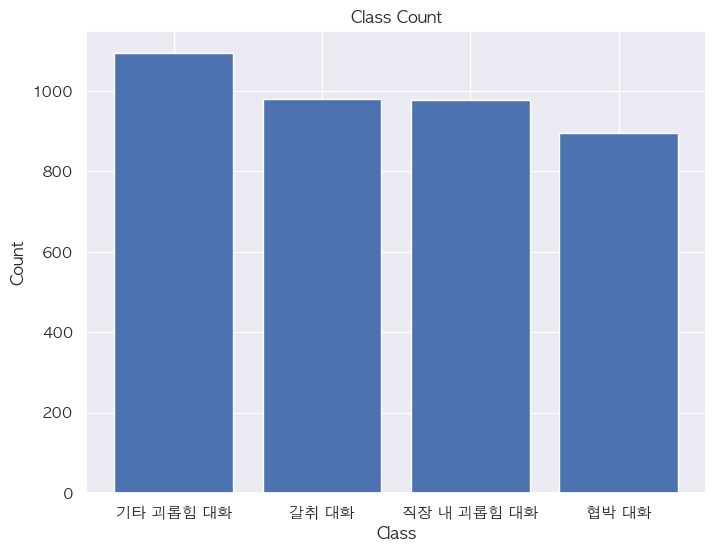

In [40]:
import matplotlib.pyplot as plt

class_counts = df['class'].value_counts()

plt.rcParams['font.family'] = 'AppleGothic'
sns.set(font="AppleGothic")

plt.figure(figsize=(8, 6))
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Count')
plt.xticks(class_counts.index)
plt.show()

In [42]:
data['conversation_length'] = data['conversation'].apply(len)
conversation_length_stats = data['conversation_length'].describe()

conversation_length_stats

count    3950.000000
mean      226.570886
std       104.560310
min        41.000000
25%       156.000000
50%       203.000000
75%       270.000000
max       874.000000
Name: conversation_length, dtype: float64

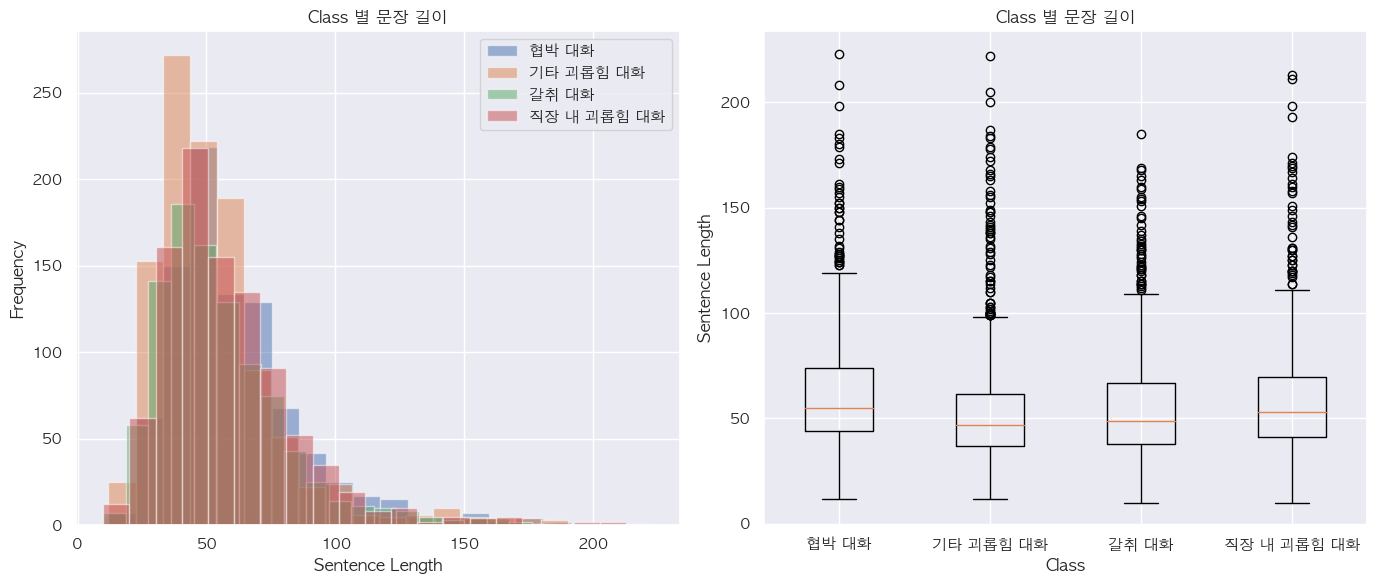

In [52]:
# 각 행의 문장 길이를 계산
df['sentence_length'] = df['conversation'].apply(lambda x: len(x.split()))

# 1x2 서브플롯으로 그래프를 표시
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 첫 번째 서브플롯 (왼쪽)
for class_label in df['class'].unique():
    subset = df[df['class'] == class_label]
    axes[0].hist(subset['sentence_length'], bins=20, alpha=0.5, label=f'{class_label}')

axes[0].set_xlabel('Sentence Length')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Class 별 문장 길이')
axes[0].legend()

# 두 번째 서브플롯 (오른쪽)
axes[1].boxplot([df[df['class'] == class_label]['sentence_length'] for class_label in df['class'].unique()], 
            labels=[f'{class_label}' for class_label in df['class'].unique()])
axes[1].set_xlabel('Class')
axes[1].set_ylabel('Sentence Length')
axes[1].set_title('Class 별 문장 길이')

# 그래프 표시
plt.tight_layout()
plt.show()

## 속성

Train 정보
- idx : 문장의 순서
- class : 해당 row의 label
- conversation : 연속형 대화 구성. \n으로 화자 분리

|클래스|Class No.|# Training|# Test|
|------|---|---|---|
|협박|00|896|100|
|갈취|01|981|100|
|직장 내 괴롭힘|02|979|100|
|기타 괴롭힘|03|1,094|100|
|일반|04|-|100|

To Do
- 일반대화 데이터 추가 (200 이상 & 250 이하로 제한)
- 데이터 분석과 시각화
- 전처리

## 일반대화 데이터 추가

### 감성 대화 말뭉치

Data set : [감성 대화 말뭉치]('https://aihub.or.kr/aihubdata/data/view.do?currMenu=115&topMenu=100&aihubDataSe=realm&dataSetSn=86')
- '기쁨' 사용

In [53]:
sample1 = pd.read_csv('../data/018.감성대화/Training_221115_add/라벨링데이터/감성대화말뭉치(최종데이터)_Training.json')

with open('../data/018.감성대화/Training_221115_add/라벨링데이터/감성대화말뭉치(최종데이터)_Training.json') as f:
    js = json.loads(f.read()) ## json 라이브러리 이용
sample1 = pd.DataFrame(js)

In [54]:
# row 생략 없이 출력
pd.set_option('display.max_rows', None)
# col 생략 없이 출력
pd.set_option('display.max_columns', None)

In [55]:
sample1.head()

,profile,talk
0,"{'persona-id': 'Pro_05349', 'persona': {'perso...","{'id': {'profile-id': 'Pro_05349', 'talk-id': ..."
1,"{'persona-id': 'Pro_05349', 'persona': {'perso...","{'id': {'profile-id': 'Pro_05349', 'talk-id': ..."
2,"{'persona-id': 'Pro_05349', 'persona': {'perso...","{'id': {'profile-id': 'Pro_05349', 'talk-id': ..."
3,"{'persona-id': 'Pro_05349', 'persona': {'perso...","{'id': {'profile-id': 'Pro_05349', 'talk-id': ..."
4,"{'persona-id': 'Pro_05349', 'persona': {'perso...","{'id': {'profile-id': 'Pro_05349', 'talk-id': ..."


In [56]:
sample1['profile'][24]

{'persona-id': 'Pro_05395',
 'persona': {'persona-id': 'A02_G02_C01',
  'human': ['A02', 'G02'],
  'computer': ['C01']},
 'emotion': {'emotion-id': 'S06_D02_E64',
  'type': 'E64',
  'situation': ['S06', 'D02']}}

In [58]:
sample1['talk'][24]

{'id': {'profile-id': 'Pro_05395', 'talk-id': 'Pro_05395_00044'},
 'content': {'HS01': '회사에서 전공시험을 봤어. 오늘 시험 결과가 나왔어.',
  'SS01': '시험 결과가 어떠셨나요?',
  'HS02': '열심히 준비한 만큼 원하던 점수가 나왔어.',
  'SS02': '준비한 만큼 점수가 잘 나와서 만족스러우시겠어요.',
  'HS03': '',
  'SS03': ''}}

In [59]:
sample1['profile'][22]

{'persona-id': 'Pro_05395',
 'persona': {'persona-id': 'A02_G02_C01',
  'human': ['A02', 'G02'],
  'computer': ['C01']},
 'emotion': {'emotion-id': 'S06_D02_E64',
  'type': 'E64',
  'situation': ['S06', 'D02']}}

In [60]:
sample1['talk'][22]

{'id': {'profile-id': 'Pro_05395', 'talk-id': 'Pro_05395_00025'},
 'content': {'HS01': '우리 회사는 정말 사내 분위기가 좋아.',
  'SS01': '사내 분위기가 좋아서 즐거우시군요.',
  'HS02': '즐거운 일이 매일 생길 거 같은 기분이야. 내가 원하는 진로로 취업해서 더 그런 거 같아.',
  'SS02': '원하는 진로에 맞춰서 취업해서 더욱 만족스럽군요.',
  'HS03': '',
  'SS03': ''}}

In [61]:
sample1['profile'][21]

{'persona-id': 'Pro_05356',
 'persona': {'persona-id': 'A02_G02_C01',
  'human': ['A02', 'G02'],
  'computer': ['C01']},
 'emotion': {'emotion-id': 'S06_D02_E25',
  'type': 'E25',
  'situation': ['S06', 'D02']}}

In [62]:
sample1['talk'][21]

{'id': {'profile-id': 'Pro_05356', 'talk-id': 'Pro_05356_00012'},
 'content': {'HS01': '어제도 야근 오늘도 야근이야. 너무 힘들어.',
  'SS01': '야근이 많아서 힘드신 것 같아요. 어떤 상황인지 자세히 말씀해 주시겠어요? ',
  'HS02': '솔직히 말하자면 굳이 야근할 일이 아니야. 근데 상사가 자꾸 야근을 시키니 미치겠어.',
  'SS02': '안 해도 될 야근을 하는 것 같아 더 스트레스받으시는 것 같군요. ',
  'HS03': '',
  'SS03': ''}}

- 위 DF에서 '기쁨'만을 사용하기 위한 전처리

In [64]:
# Load the provided Excel file
general_data_excel = pd.read_excel('../data/018.감성대화/Training_221115_add/원천데이터/감성대화말뭉치(최종데이터)_Training.xlsx')

# Display the first few rows of the data from the Excel file
general_data_excel.head()

,Unnamed: 0,연령,성별,상황키워드,신체질환,감정_대분류,감정_소분류,사람문장1,시스템문장1,사람문장2,시스템문장2,사람문장3,시스템문장3
0,1,청년,여성,"진로,취업,직장",해당없음,분노,노여워하는,일은 왜 해도 해도 끝이 없을까? 화가 난다.,많이 힘드시겠어요. 주위에 의논할 상대가 있나요?,그냥 내가 해결하는 게 나아. 남들한테 부담 주고 싶지도 않고.,혼자 해결하기로 했군요. 혼자서 해결하기 힘들면 주위에 의논할 사람을 찾아보세요.,NaN,NaN
1,2,청년,여성,"진로,취업,직장",해당없음,분노,노여워하는,이번 달에 또 급여가 깎였어! 물가는 오르는데 월급만 자꾸 깎이니까 너무 화가 나.,급여가 줄어 속상하시겠어요. 월급이 줄어든 것을 어떻게 보완하실 건가요?,최대한 지출을 억제해야겠어. 월급이 줄어들었으니 고정지출을 줄일 수밖에 없을 것 같아.,월급이 줄어든 만큼 소비를 줄일 계획이군요.,NaN,NaN
2,3,청년,여성,"진로,취업,직장",해당없음,분노,노여워하는,회사에 신입이 들어왔는데 말투가 거슬려. 그런 애를 매일 봐야 한다고 생각하니까 스...,회사 동료 때문에 스트레스를 많이 받는 것 같아요. 문제 해결을 위해 어떤 노력을 ...,잘 안 맞는 사람이랑 억지로 잘 지내는 것보단 조금은 거리를 두고 예의를 갖춰서 대...,스트레스받지 않기 위해선 인간관계에 있어 약간의 거리를 두는 게 좋겠군요.,NaN,NaN
3,4,청년,여성,"진로,취업,직장",해당없음,분노,노여워하는,직장에서 막내라는 이유로 나에게만 온갖 심부름을 시켜. 일도 많은 데 정말 분하고 ...,관련 없는 심부름을 모두 하게 되어서 노여우시군요. 어떤 것이 상황을 나아질 수 있...,직장 사람들과 솔직하게 이야기해보고 싶어. 일하는 데에 방해된다고.,직장 사람들과 이야기를 해 보겠다고 결심하셨군요.,NaN,NaN
4,5,청년,여성,"진로,취업,직장",해당없음,분노,노여워하는,얼마 전 입사한 신입사원이 나를 무시하는 것 같아서 너무 화가 나.,무시하는 것 같은 태도에 화가 나셨군요. 상대방의 어떤 행동이 그런 감정을 유발하는...,상사인 나에게 먼저 인사하지 않아서 매일 내가 먼저 인사한다고!,항상 먼저 인사하게 되어 화가 나셨군요. 어떻게 하면 신입사원에게 화났음을 표현할 ...,NaN,NaN


In [66]:
# Reload the original CSV and Excel datasets
original_data_csv = pd.read_csv('../data/train.csv')
general_data_excel = pd.read_excel('../data/018.감성대화/Training_221115_add/원천데이터/감성대화말뭉치(최종데이터)_Training.xlsx')

# Filter the '기쁨' conversations from the Excel file
happiness_conversations = general_data_excel[general_data_excel['감정_대분류'] == '기쁨']

# Extract concatenated conversations for '기쁨' from the Excel file
happiness_conversations_list = []

for _, row in happiness_conversations.iterrows():
    # Concatenate all the user and system sentences to form the conversation
    conversation = ' '.join([str(row[f'사람문장{i}']) + ' ' + str(row[f'시스템문장{i}']) 
                             for i in range(1, 4) if pd.notnull(row[f'사람문장{i}']) and pd.notnull(row[f'시스템문장{i}'])]).strip()
    if conversation:
        happiness_conversations_list.append(conversation)

# Create a DataFrame with the concatenated '기쁨' conversations and label them as '일반 대화'
happiness_conversations_df = pd.DataFrame({
    'class': ['일반 대화'] * len(happiness_conversations_list),
    'conversation': happiness_conversations_list
})

# Combine the '기쁨' conversations labeled as '일반 대화' with the original dataset from CSV
final_data = pd.concat([original_data_csv, happiness_conversations_df], ignore_index=True)

# Display the distribution of the classes in the final dataset
final_data['class'].value_counts()

일반 대화          6126
기타 괴롭힘 대화      1094
갈취 대화           981
직장 내 괴롭힘 대화     979
협박 대화           896
Name: class, dtype: int64

In [67]:
# Drop the 'idx' column from the final dataset
final_data = final_data.drop(columns=['idx'])

final_data = final_data.drop_duplicates()

# Display the distribution of the classes in the final dataset after removing duplicates
final_data['class'].value_counts()

일반 대화          6126
기타 괴롭힘 대화      1011
갈취 대화           973
직장 내 괴롭힘 대화     970
협박 대화           892
Name: class, dtype: int64

In [74]:
final_data.head()

,class,conversation
0,협박 대화,지금 너 스스로를 죽여달라고 애원하는 것인가?\n 아닙니다. 죄송합니다.\n 죽을 ...
1,협박 대화,길동경찰서입니다.\n9시 40분 마트에 폭발물을 설치할거다.\n네?\n똑바로 들어 ...
2,기타 괴롭힘 대화,너 되게 귀여운거 알지? 나보다 작은 남자는 첨봤어.\n그만해. 니들 놀리는거 재미...
3,갈취 대화,어이 거기\n예??\n너 말이야 너. 이리 오라고\n무슨 일.\n너 옷 좋아보인다?...
4,갈취 대화,저기요 혹시 날이 너무 뜨겁잖아요? 저희 회사에서 이 선크림 파는데 한 번 손등에 ...


In [68]:
# Filter and display a few rows with the class '일반 대화' from the final_data dataframe
happiness_samples_final = final_data[final_data['class'] == '일반 대화'].sample(5)

happiness_samples_final

,class,conversation
9715,일반 대화,나 사실 학기 중에 전학을 온 거라 왕따 걱정했는데 우리 반은 그런 게 없는 것 같...
6802,일반 대화,나는 병원비를 감당할 수 있을 만큼의 넉넉한 돈을 가졌어. 참 다행이고 기쁜 일이야...
9976,일반 대화,왕따를 당한게 내가 아니어서 다행이야. 그랬군요. 왕따를 누가 당했나요? 다른 반 ...
6914,일반 대화,오빠가 실력이 좋아서 프로게이머가 될 수 있을 것 같아. 오빠가 프로게이머가 될 수...
7500,일반 대화,학교에 적응을 못해 혼자 다녔는데 어떤 친구가 같이 밥을 먹자고 해서 기뻐. 같이 ...


In [75]:
final_data.to_csv("mergedata.csv", mode='w')

### Merge Data로 전처리

In [78]:
df = pd.read_csv('../data/mergedata.csv')

In [79]:
df.head()

,Unnamed: 0,class,conversation
0,0,협박 대화,지금 너 스스로를 죽여달라고 애원하는 것인가?\n 아닙니다. 죄송합니다.\n 죽을 ...
1,1,협박 대화,길동경찰서입니다.\n9시 40분 마트에 폭발물을 설치할거다.\n네?\n똑바로 들어 ...
2,2,기타 괴롭힘 대화,너 되게 귀여운거 알지? 나보다 작은 남자는 첨봤어.\n그만해. 니들 놀리는거 재미...
3,3,갈취 대화,어이 거기\n예??\n너 말이야 너. 이리 오라고\n무슨 일.\n너 옷 좋아보인다?...
4,4,갈취 대화,저기요 혹시 날이 너무 뜨겁잖아요? 저희 회사에서 이 선크림 파는데 한 번 손등에 ...


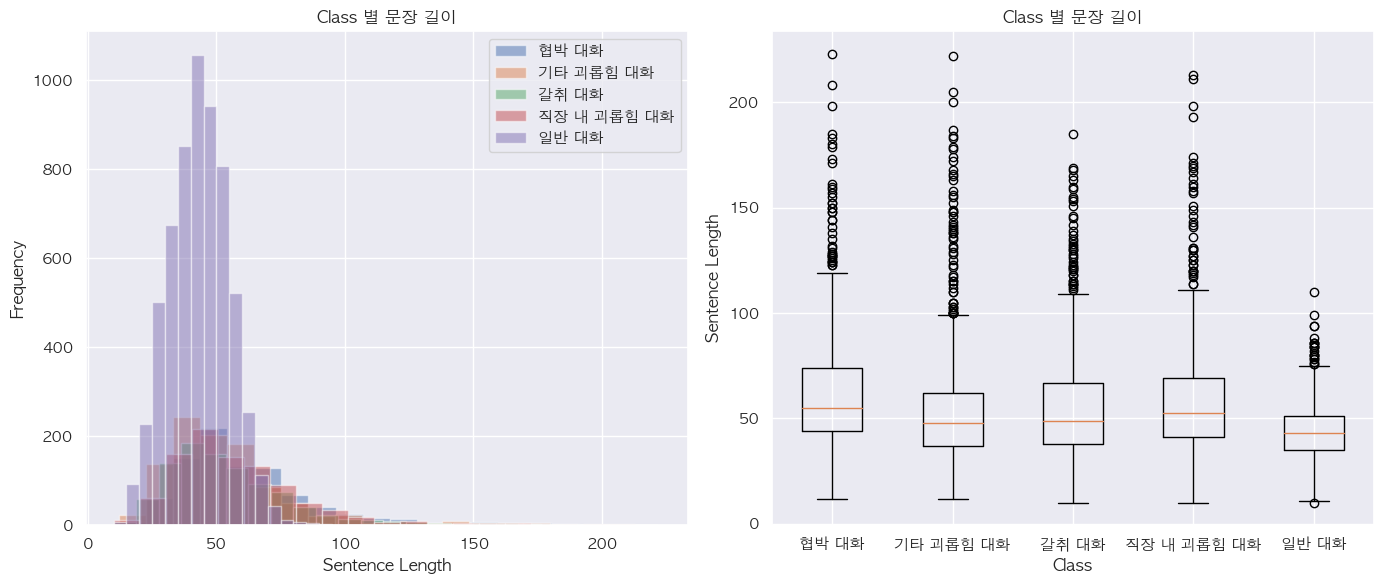

In [80]:
# 각 행의 문장 길이를 계산
df['sentence_length'] = df['conversation'].apply(lambda x: len(x.split()))

# 1x2 서브플롯으로 그래프를 표시
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 첫 번째 서브플롯 (왼쪽)
for class_label in df['class'].unique():
    subset = df[df['class'] == class_label]
    axes[0].hist(subset['sentence_length'], bins=20, alpha=0.5, label=f'{class_label}')

axes[0].set_xlabel('Sentence Length')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Class 별 문장 길이')
axes[0].legend()

# 두 번째 서브플롯 (오른쪽)
axes[1].boxplot([df[df['class'] == class_label]['sentence_length'] for class_label in df['class'].unique()], 
            labels=[f'{class_label}' for class_label in df['class'].unique()])
axes[1].set_xlabel('Class')
axes[1].set_ylabel('Sentence Length')
axes[1].set_title('Class 별 문장 길이')

# 그래프 표시
plt.tight_layout()
plt.show()